In [7]:
import pandas as pd      
import numpy as np 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',  None)
pd.options.display.float_format = '{:,.1f}'.format

In [6]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    mape = mean_absolute_percentage_error (actual, pred)
    score = r2_score(actual, pred)
    return print(" r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse, "\n","mape:",mape)

In [8]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [11]:
df.head(2)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,"56,013.0",Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,"1,422.0","1,220.0",front,3.8
1,Audi A1,Sedans,14500,Price negotiable,"80,000.0",Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,"1,798.0","1,255.0",front,5.6


In [12]:
df.shape

(15915, 23)

In [13]:
df.isnull().sum().any()

False

In [14]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [15]:
numerical= df.select_dtypes('number').columns
categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['price', 'km', 'Gears', 'age', 'Previous_Owners', 'hp_kW',
       'Inspection_new', 'Displacement_cc', 'Weight_kg', 'cons_comb'],
      dtype='object')


Categorical Columns: Index(['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')


In [16]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,"15,915.0","15,915.0","15,915.0","15,915.0","15,915.0","15,915.0","15,915.0","15,915.0","15,915.0","15,915.0"
mean,"18,024.4","32,090.0",5.9,1.4,1.0,88.5,0.2,"1,428.7","1,337.7",4.8
std,"7,381.7","36,977.2",0.7,1.1,0.3,26.7,0.4,275.8,199.7,0.9
min,"4,950.0",0.0,5.0,0.0,0.0,40.0,0.0,890.0,840.0,3.0
25%,"12,850.0","1,920.5",5.0,0.0,1.0,66.0,0.0,"1,229.0","1,165.0",4.1
50%,"16,900.0","20,413.0",6.0,1.0,1.0,85.0,0.0,"1,461.0","1,295.0",4.8
75%,"21,900.0","46,900.0",6.0,2.0,1.0,103.0,0.0,"1,598.0","1,472.0",5.4
max,"74,600.0","317,000.0",8.0,3.0,4.0,294.0,1.0,"2,967.0","2,471.0",9.1


In [17]:
df.describe(include="object").T

,count,unique,top,freq
make_model,15915,9,Audi A3,3097
body_type,15915,8,Sedans,8004
vat,15915,2,VAT deductible,15044
Type,15915,5,Used,11095
Fuel,15915,4,Benzine,8548
Comfort_Convenience,15915,6196,"Air conditioning,Electrical side mirrors,Hill ...",388
Entertainment_Media,15915,346,"Bluetooth,Hands-free equipment,On-board comput...",1737
Extras,15915,659,Alloy wheels,5785
Safety_Security,15915,4442,"ABS,Central door lock,Daytime running lights,D...",729
Paint_Type,15915,3,Metallic,15246


In [18]:
print("Number of Uniques:\n", df.select_dtypes('object').nunique(),'\n', sep='')

Number of Uniques:
make_model                9
body_type                 8
vat                       2
Type                      5
Fuel                      4
Comfort_Convenience    6196
Entertainment_Media     346
Extras                  659
Safety_Security        4442
Paint_Type                3
Upholstery_type           2
Gearing_Type              3
Drive_chain               3
dtype: int64



In [19]:
print("Number of Uniques:\n", df.select_dtypes('number').nunique(), '\n', sep='')

Number of Uniques:
price              2952
km                 6691
Gears                 4
age                   4
Previous_Owners       5
hp_kW                77
Inspection_new        2
Displacement_cc      68
Weight_kg           432
cons_comb            62
dtype: int64



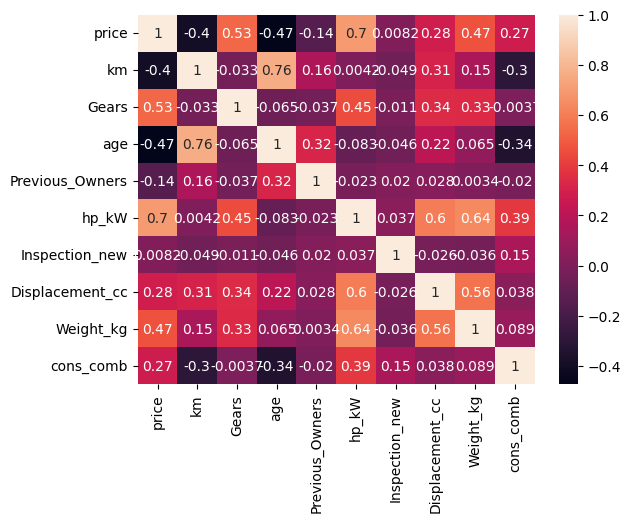

In [20]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [21]:
pd.DataFrame(df.select_dtypes('number').agg(['min', 'max']))

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
min,4950,0.0,5.0,0.0,0.0,40.0,0,890.0,840.0,3.0
max,74600,"317,000.0",8.0,3.0,4.0,294.0,1,"2,967.0","2,471.0",9.1


In [22]:
df.age.unique()

array([3., 2., 1., 0.])

In [25]:
df.km.nunique()

6691

In [26]:
df.Gearing_Type.unique()

array(['Automatic', 'Manual', 'Semi-automatic'], dtype=object)

In [27]:
df.make_model.unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

In [29]:
df.make_model.value_counts()

make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

In [30]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,"26,166.0",Employee's car,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.0,1.0,85.0,0,Metallic,Cloth,Manual,"1,598.0","1,135.0",front,4.9


In [31]:
df.drop(index=[2614], inplace =True)

In [32]:
df.make_model.unique()

array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Duster', 'Renault Espace'], dtype=object)

In [33]:
new_list=["age", "hp_kW", "km", "Gearing_Type", 'make_model']

In [34]:
X=df[new_list]
y=df['price']

In [35]:
X.sample(5)

,age,hp_kW,km,Gearing_Type,make_model
4939,1.0,85.0,"21,851.0",Manual,Audi A3
10309,0.0,51.0,5.0,Manual,Opel Corsa
290,3.0,85.0,"46,900.0",Automatic,Audi A1
13557,3.0,54.0,"26,743.0",Manual,Renault Clio
5935,2.0,103.0,"31,000.0",Automatic,Opel Astra


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

In [38]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gearing_Type', 'make_model'], dtype='object')

In [40]:
ord_enc = OrdinalEncoder()
column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas") # remainder: # Keep other columns rather than cat in original form.
                                                                                # remainder: # if you want to scale rest of cat columns use "minmax" instead passthrough
    
    # Apply ord_enc to categoric variables and remain in original form rest of them.
    # ord_enc for DT based algorithms
    # For Linear reg, log reg vs. use one hot encoder 

In [41]:
X_train=column_trans.fit_transform(X_train)
X_test=column_trans.transform(X_test)

In [42]:
X_train

,Gearing_Type,make_model,age,hp_kW,km
14286,1.0,5.0,0.0,56.0,10.0
6376,1.0,2.0,3.0,81.0,"139,000.0"
5243,0.0,1.0,0.0,85.0,"18,000.0"
14374,0.0,5.0,0.0,66.0,10.0
90,0.0,0.0,3.0,92.0,"15,093.0"
...,...,...,...,...,...
13124,0.0,5.0,0.0,66.0,10.0
3265,1.0,1.0,3.0,81.0,"79,988.0"
9846,0.0,3.0,0.0,66.0,355.0
10800,0.0,4.0,3.0,125.0,"232,000.0"


In [43]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
y_pred = rf_model.predict(X_test)

In [45]:
eval_metrics(y_test, y_pred)

 r2_score: 0.9289298703314749 
 mae: 1137.2068398130746 
 mse: 3558367.417940223 
 rmse: 1886.3635434189835 
 mape: 0.062381803504260536


In [46]:
import pickle
pickle.dump(rf_model, open('rf_model', 'wb'))

In [47]:
pickle.dump(column_trans, open('transformer', 'wb'))

**deployment**

In [49]:
model = pickle.load(open('rf_model', 'rb'))

In [50]:
transformer = pickle.load(open('transformer', 'rb'))

In [52]:
my_dict = {
    "age": 2,
    "hp_kW": 105,
    "km": 100000,
    "Gearing_Type":"Automatic",
    "make_model": 'Audi A3'
}

In [53]:
df = pd.DataFrame.from_dict([my_dict])

In [54]:
df.head()

,age,hp_kW,km,Gearing_Type,make_model
0,2,105,100000,Automatic,Audi A3


In [55]:
df2 = transformer.transform(df)

In [56]:
df2

,Gearing_Type,make_model,age,hp_kW,km
0,0.0,1.0,2,105,100000


In [58]:
prediction = model.predict(df2)
prediction

array([19240.25])

In [59]:
print("The estimated price of your car is €{}. ".format(int(prediction[0])))

The estimated price of your car is €19240. 


In [60]:
!streamlit run my_app.py

^C
